In [1]:
import pandas as pd

In [2]:
from datetime import datetime

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv (r'C://at17DB//ca-2004-01.csv', sep = ';')

In [5]:
df

,Regiao,Sigla,Municipio,Revenda,CNPJ,Rua,Numero,Complemento,Bairro,Cep,Produto,Data_da_Coleta,Valor_de_Venda,Valor_de_Compra,Unidade_de_Medida,Bandeira
0,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,11/05/2004,"1,967","1,6623",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,ETANOL,11/05/2004,"0,899","0,6282",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,DIESEL,11/05/2004,"1,299","1,1704",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,10/05/2004,"1,85","1,67",R$ / litro,BRANCA
4,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,10/05/2004,"0,78","0,48",R$ / litro,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281526,NE,BA,LIVRAMENTO DE NOSSA SENHORA,AUTO POSTO PIRES PEREIRA LTDA,02.253.236/0001-65,AVENIDA LINDEMBERG CARDOSO,667,COMODO,TAQUARI,46140-000,GASOLINA,28/06/2004,"2,2","1,89",R$ / litro,PETROBAHIA
281527,NE,BA,LIVRAMENTO DE NOSSA SENHORA,AUTO POSTO PIRES PEREIRA LTDA,02.253.236/0001-65,AVENIDA LINDEMBERG CARDOSO,667,COMODO,TAQUARI,46140-000,ETANOL,28/06/2004,"1,48",NaN,R$ / litro,PETROBAHIA
281528,NE,BA,LIVRAMENTO DE NOSSA SENHORA,AUTO POSTO PIRES PEREIRA LTDA,02.253.236/0001-65,AVENIDA LINDEMBERG CARDOSO,667,COMODO,TAQUARI,46140-000,DIESEL,28/06/2004,"1,41","1,32",R$ / litro,PETROBAHIA
281529,NE,BA,LIVRAMENTO DE NOSSA SENHORA,AUTO POSTO 5 DE FEVEREIRO LTDA,02.125.226/0001-44,PRACA CORONEL ZEZINHO TANAJURA,1,COMODO,CENTRO,46140-000,ETANOL,28/06/2004,"1,49","0,6909",R$ / litro,PETROBAHIA


In [6]:
df.dropna(subset=['Valor_de_Compra'], inplace= True)

In [7]:
df['Data_da_Coleta'] = pd.to_datetime(df['Data_da_Coleta'], format = ('%d/%m/%Y'))

In [8]:
df['Valor_de_Venda'] = df['Valor_de_Venda'].apply(lambda x: float(x.replace(".","").replace(",",".")))

In [9]:
df['Valor_de_Compra'] = df['Valor_de_Compra'].apply(lambda x: float(x.replace(".","").replace(",",".")))

In [10]:
df['Rua'] = df['Rua'].apply(lambda x: str(x.replace("","").replace("'","")))
df['Revenda'] = df['Revenda'].apply(lambda y: str(y.replace("","").replace("'","")))
df['Municipio'] = df['Municipio'].apply(lambda b: str(b.replace("","").replace("'","")))
df['Bandeira'] = df['Bandeira'].apply(lambda b: str(b.replace("","").replace("'","")))

In [11]:
print("Processo de carga dos dados no BD Iniciando!")
print(datetime.today())

Processo de carga dos dados no BD Iniciando!
2022-05-02 13:25:38.163332


In [12]:
print("+++ PROCESSO FINALIZADO COM SUCESSO +++")
print(datetime.today())
print()

+++ PROCESSO FINALIZADO COM SUCESSO +++
2022-05-02 13:25:38.432647



In [13]:
# Extração de dados da entidade Postos
print(f"Data inicial da coleta: ", df['Data_da_Coleta'].min())
print(f"Data final da coleta: ", df['Data_da_Coleta'].max())
print()

Data inicial da coleta:  2004-05-10 00:00:00
Data final da coleta:  2004-06-30 00:00:00



In [14]:
# Extração de dados agrupados por Região
print(df.groupby(['Regiao']).agg({'Valor_de_Venda':'sum'}))
print()

        Valor_de_Venda
Regiao                
CO          24695.9710
N           17487.7280
NE          48192.3670
S           49785.2460
SE         160863.2145



# Criação do gráfico de barras

Text(0.5, 0.98, 'Categorical Plotting')

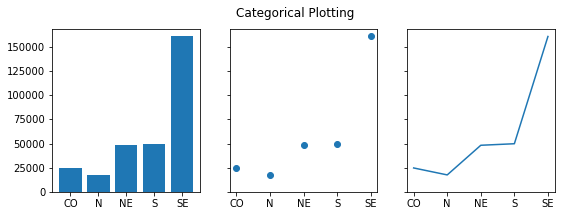

In [15]:
data = {'CO': 24695.97, 'N': 17487.72, 'NE': 48192.36, 'S': 49785.24, 'SE': 160863.21}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

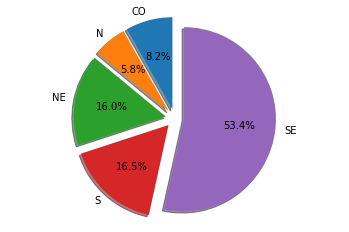

In [16]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'CO', 'N', 'NE', 'S','SE'
sizes = [24695.97, 17487.72, 48192.36, 49785.24, 160863.21]
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [17]:
df['Valor_de_Venda'].sum()

301024.5264999999

In [18]:
df['Valor_de_Compra'].sum()

252839.62179999996

In [19]:
print(df['Valor_de_Venda'].sum() - df['Valor_de_Compra'].sum())

48184.904699999955
